In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set_theme(style="darkgrid")

#dummy output for units
# Finished evaluating FIFO Queue
# average total Enqueue time [ms] = 0.18774
# average enqueues/s [1/ms] = 6543.13
# average time per enqueue [ns] = 0.152832
# average total Dequeue time [ms] = 0.30368
# average dequeues/s [1/ms] = 429.304
# average time per dequeue [ns] = 2.32935

In [16]:
path = '../measurements'
all_files = glob.glob(path + "/*.csv")

fifoname, lbqname, scqname = 'FIFO', 'LockBased', 'SCQ'

df = pd.DataFrame()

fifo = pd.DataFrame()
fifo100 = pd.DataFrame()
fifo1000 = pd.DataFrame()
fifo10000 = pd.DataFrame()
fifo100000 = pd.DataFrame()
fifo1000000 = pd.DataFrame()

lbq = pd.DataFrame()
lbq100 = pd.DataFrame()
lbq1000 = pd.DataFrame()
lbq10000 = pd.DataFrame()
lbq100000 = pd.DataFrame()
lbq1000000 = pd.DataFrame()

scq = pd.DataFrame()

for f in all_files:
    
    df1 = pd.read_csv(f, sep=";")

    if fifoname in f:
        fifo = fifo.append(df1)
    elif lbqname in f:
        lbq = lbq.append(df1)
    
    df = df.append(df1)
    #display(df)
    #print()
    
fifo100 = fifo.loc[fifo['object count'] == 100]
lbq100 = lbq.loc[lbq['object count'] == 100]
fifo1000 = fifo.loc[fifo['object count'] == 1000]
lbq1000 = lbq.loc[lbq['object count'] == 1000]
fifo10000 = fifo.loc[fifo['object count'] == 10000]
lbq10000 = lbq.loc[lbq['object count'] == 10000]
fifo100000 = fifo.loc[fifo['object count'] == 100000]
lbq100000 = lbq.loc[lbq['object count'] == 100000]
fifo1000000 = fifo.loc[fifo['object count'] == 1000000]
lbq1000000 = lbq.loc[lbq['object count'] == 1000000]
#print(fifo100)
#display(df)
#display(fifo)

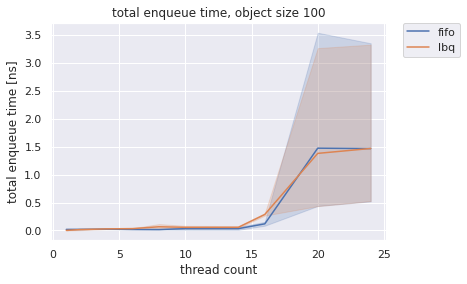

In [17]:
enqueue = sns.lineplot(x="thread count", y="total enqueue time", label="fifo", data=fifo100).set_title("total enqueue time, object size 100")
enqueue = sns.lineplot(x="thread count", y="total enqueue time", label="lbq", data=lbq100)
enqueue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
enqueue.set(xlabel ="thread count", ylabel = "total enqueue time [ns]", title ="total enqueue time, object size 100")
plt.savefig('./plots/totenq100.png')
#plt.ylim(0, 60)


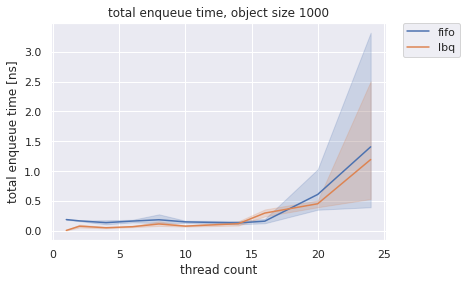

In [18]:
enqueue = sns.lineplot(x="thread count", y="total enqueue time", label="fifo", data=fifo1000).set_title("total enqueue time, object size 1000")
enqueue = sns.lineplot(x="thread count", y="total enqueue time", label="lbq", data=lbq1000)
enqueue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
enqueue.set(xlabel ="thread count", ylabel = "total enqueue time [ns]", title ="total enqueue time, object size 1000")
plt.savefig('./plots/totenq1000.png')

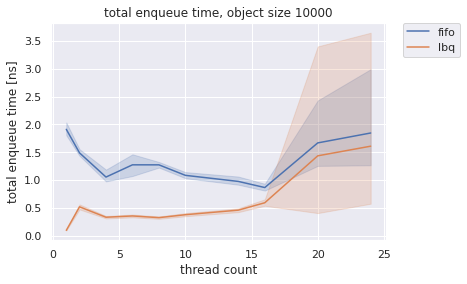

In [19]:
enqueue = sns.lineplot(x="thread count", y="total enqueue time", label="fifo", data=fifo10000).set_title("total enqueue time, object size 10000")
enqueue = sns.lineplot(x="thread count", y="total enqueue time", label="lbq", data=lbq10000)
enqueue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
enqueue.set(xlabel ="thread count", ylabel = "total enqueue time [ns]", title ="total enqueue time, object size 10000")
plt.savefig('./plots/totenq10000.png')

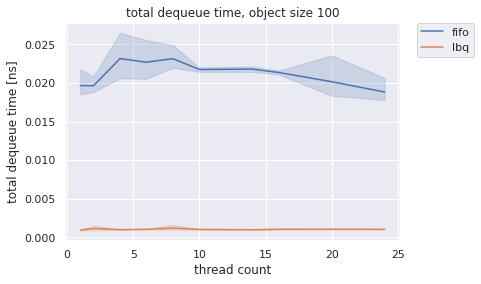

In [20]:
dequeue = sns.lineplot(x="thread count", y="total dequeue time", label="fifo", data=fifo100).set_title("total dequeue time, object size 100")
dequeue = sns.lineplot(x="thread count", y="total dequeue time", label="lbq", data=lbq100)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "total dequeue time [ns]", title ="total dequeue time, object size 100")
plt.savefig('./plots/totdeq100.png')

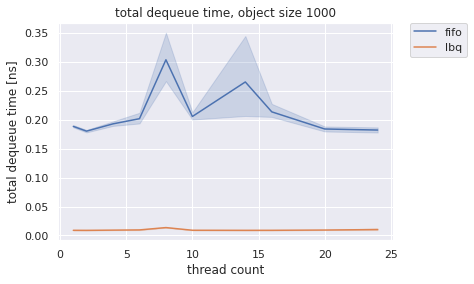

In [21]:
dequeue = sns.lineplot(x="thread count", y="total dequeue time", label="fifo", data=fifo1000)
dequeue = sns.lineplot(x="thread count", y="total dequeue time", label="lbq", data=lbq1000)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "total dequeue time [ns]", title ="total dequeue time, object size 1000")
plt.savefig('./plots/totdeq1000.png')

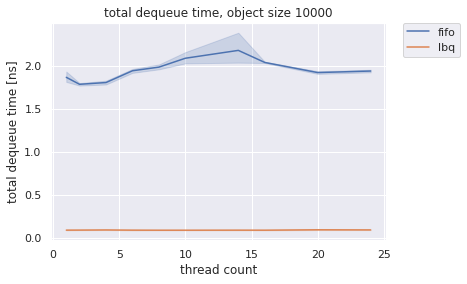

In [22]:
dequeue = sns.lineplot(x="thread count", y="total dequeue time", label="fifo", data=fifo10000)
dequeue = sns.lineplot(x="thread count", y="total dequeue time", label="lbq", data=lbq10000)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "total dequeue time [ns]", title ="total dequeue time, object size 10000")
plt.savefig('./plots/totdeq10000.png')

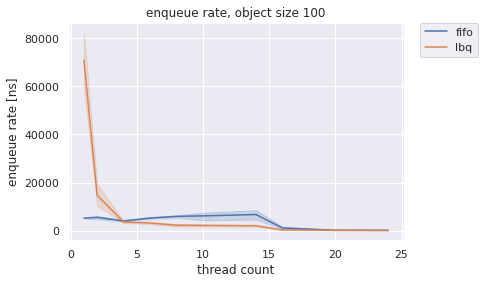

In [23]:
dequeue = sns.lineplot(x="thread count", y="enqueue rate", label="fifo", data=fifo100)
dequeue = sns.lineplot(x="thread count", y="enqueue rate", label="lbq", data=lbq100)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "enqueue rate [ns]", title ="enqueue rate, object size 100")
plt.savefig('./plots/enqR100.png')

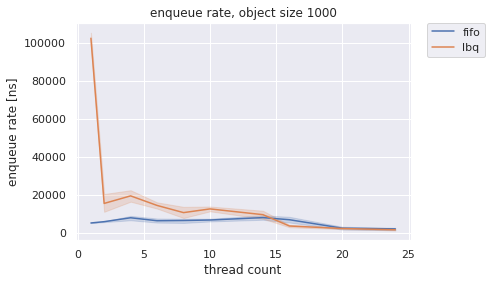

In [24]:
dequeue = sns.lineplot(x="thread count", y="enqueue rate", label="fifo", data=fifo1000)
dequeue = sns.lineplot(x="thread count", y="enqueue rate", label="lbq", data=lbq1000)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "enqueue rate [ns]", title ="enqueue rate, object size 1000")
plt.savefig('./plots/enqR1000.png')

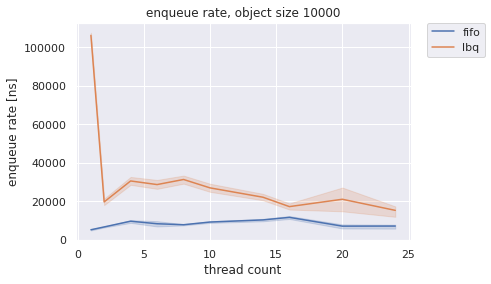

In [25]:
dequeue = sns.lineplot(x="thread count", y="enqueue rate", label="fifo", data=fifo10000)
dequeue = sns.lineplot(x="thread count", y="enqueue rate", label="lbq", data=lbq10000)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "enqueue rate [ns]", title ="enqueue rate, object size 10000")
plt.savefig('./plots/enqR10000.png')

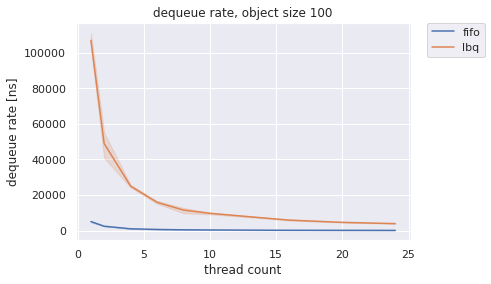

In [26]:
dequeue = sns.lineplot(x="thread count", y="dequeue rate", label="fifo", data=fifo100)
dequeue = sns.lineplot(x="thread count", y="dequeue rate", label="lbq", data=lbq100)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "dequeue rate [ns]", title ="dequeue rate, object size 100")
plt.savefig('./plots/deqR100.png')


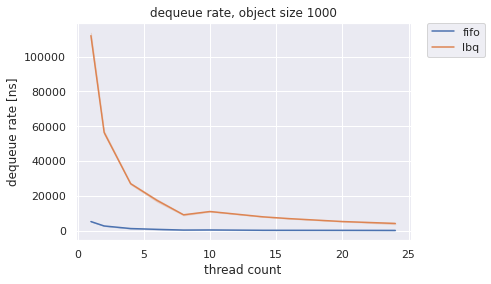

In [27]:
dequeue = sns.lineplot(x="thread count", y="dequeue rate", label="fifo", data=fifo1000)
dequeue = sns.lineplot(x="thread count", y="dequeue rate", label="lbq", data=lbq1000)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "dequeue rate [ns]", title ="dequeue rate, object size 1000")
plt.savefig('./plots/deqR1000.png')

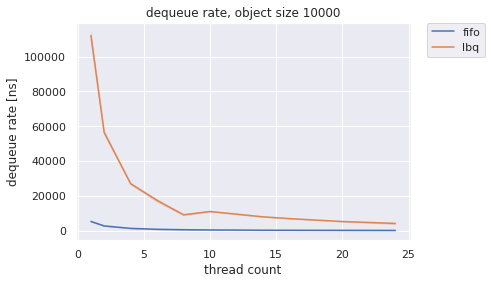

In [28]:
dequeue = sns.lineplot(x="thread count", y="dequeue rate", label="fifo", data=fifo10000)
dequeue = sns.lineplot(x="thread count", y="dequeue rate", label="lbq", data=lbq1000)
dequeue.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dequeue.set(xlabel ="thread count", ylabel = "dequeue rate [ns]", title ="dequeue rate, object size 10000")
plt.savefig('./plots/deqR10000.png')